In [1]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import auc
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, precision_recall_curve, recall_score
import matplotlib.pyplot as plt
from yellowbrick.classifier import ClassBalance, ROCAUC, ClassificationReport, ClassPredictionError
import itertools

In [3]:
csv_path = "/Users/ecem/Desktop/gyrocardiogram/s-vs-r"

## Load data

Here, our target is to predict disease correctly. So; our y will be disease column of  dataset

In [5]:
features = pd.read_csv(csv_path + "/spectral_features_scg.csv", index_col = 0)

In [6]:
features

,SR x,E z,E x,E y,SR z,SS z,SE x,SE y,SE z,SC y,SS x,SC x,SS y,SC z,SR y
0,0.206250,3.321919,3.321548,3.321678,2.953125e-01,0.247556,1.326060,0.388094,2.013945,0.259748,0.281333,0.302684,0.287911,2.859439e-01,0.033594
1,0.309375,3.321920,3.321668,3.321678,3.171875e-01,0.251753,1.749851,0.404518,2.075349,0.272052,0.285380,0.328710,0.290203,2.999224e-01,0.028906
2,0.396094,3.321922,3.321799,3.321751,3.460937e-01,0.251265,2.068534,0.489166,2.192129,0.300373,0.285031,0.340882,0.294217,3.114147e-01,0.038281
3,0.400000,3.321922,3.321825,3.321755,3.382812e-01,0.250696,2.105146,0.465596,2.137057,0.285988,0.281644,0.338696,0.289880,3.132213e-01,0.037500
4,0.381250,3.321924,3.321794,3.321758,3.453125e-01,0.254326,1.985826,0.487260,2.217650,0.281957,0.285216,0.333969,0.292110,3.114619e-01,0.049219
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012,0.572072,3.321927,3.321532,3.311345,3.154749e+180,0.270685,0.794899,0.347932,2.513784,0.292104,0.286042,0.403641,0.264417,2.583923e+161,-0.136127
2013,-0.124001,3.321925,3.321484,3.304559,2.212087e+214,0.225259,2.311011,1.331310,2.568464,-0.966435,0.231898,0.120739,0.215633,6.307379e-311,0.197016
2014,0.116211,3.302838,2.902293,3.149356,1.428540e+248,0.211171,0.658981,0.935960,0.541818,-0.197797,0.209855,-0.498068,0.215413,2.583979e+161,-0.172135
2015,0.257894,3.211450,2.715989,3.068933,5.134579e+199,0.239102,0.490014,0.609912,0.119040,-0.412650,0.207599,0.070740,0.222084,2.875173e+161,0.033885


In [7]:
x_, y_, z_, = [],[],[]
for i in range(15):
    if "x"  in features.columns[i]:
        x_.append(features.columns[i])
    elif "y"  in features.columns[i]:
        y_.append(features.columns[i])
    elif "z"  in features.columns[i]:
        z_.append(features.columns[i])
        

In [8]:
features_x = features.loc[:,x_]
features_y = features.loc[:,y_]
features_z = features.loc[:,z_]

In [11]:
y = np.concatenate( [np.ones((1521)), np.zeros((2017))] )

In [12]:
y.shape

(3538,)

## X:

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(features_x)

In [14]:
X_train, X_valid, y_train, y_valid = train_test_split(x_train, y, train_size=0.8, test_size=0.2,
                                                                random_state=42)

In [15]:
import xgboost as xgb
model  = xgb.XGBClassifier(random_state = 42, eval_metric = 'merror') 

# Fit the model
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='merror', gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, ...)

In [16]:
predictions = model.predict(X_valid)

In [17]:
classes = ['S', 'R']

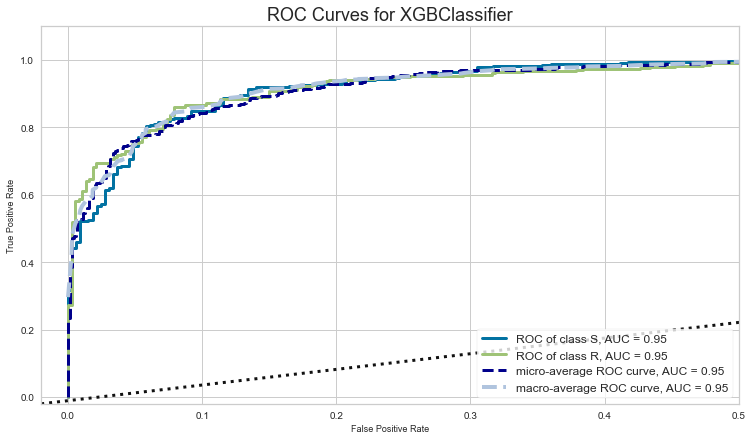

In [18]:
rocauc = ROCAUC(model, size=(900, 500), classes=classes )

rocauc.fit(X_train, y_train)       
rocauc.score(X_valid, y_valid)  
r = rocauc.poof()

/Users/ecem/miniforge3/envs/tf-metal/lib/python3.9/site-packages/yellowbrick/classifier/base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(


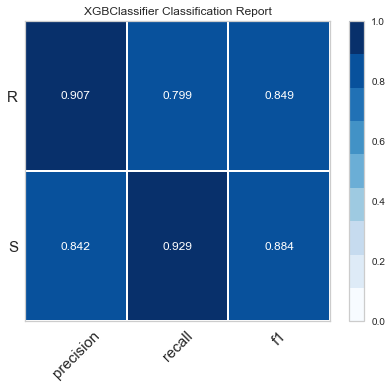

In [19]:
report = ClassificationReport(model, size=(425, 400), classes=classes, cmap = 'Blues', fontsize=15 )

report.score(X_valid, y_valid)
c = report.poof()

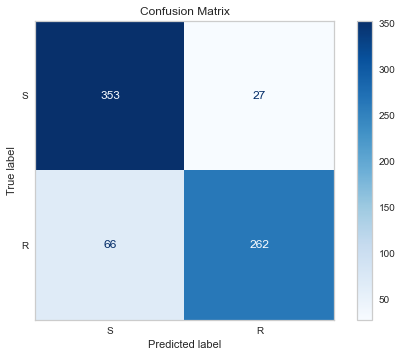

In [20]:
from sklearn.metrics import ConfusionMatrixDisplay
conf =  ConfusionMatrixDisplay.from_estimator(model, X_valid, y_valid, display_labels= ['S', 'R'], cmap = 'Blues') 
conf.ax_.set_title("Confusion Matrix")
plt.grid(None)
plt.show()

In [21]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_valid, predictions)
print("accuracy: %.2f%%" % (accuracy * 100.0))

recall = recall_score(y_valid, predictions, average= 'weighted')
print("recall: %.2f%%" % (recall * 100.0))

from sklearn.metrics import precision_score
precision = precision_score(y_valid, predictions, average= 'weighted')
print("precision: %.2f%%" % (precision * 100.0))

accuracy: 86.86%
recall: 86.86%
precision: 87.22%


## Y

In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(features_y)

In [23]:
X_train, X_valid, y_train, y_valid = train_test_split(x_train, y, train_size=0.8, test_size=0.2,
                                                                random_state=42)
import xgboost as xgb
model  = xgb.XGBClassifier(random_state = 42, eval_metric = 'merror') 

# Fit the model
model.fit(X_train, y_train)

predictions = model.predict(X_valid)

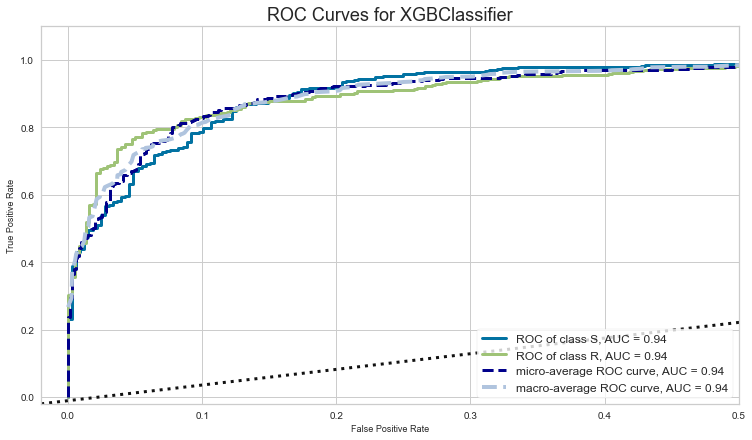

In [24]:
rocauc = ROCAUC(model, size=(900, 500), classes=classes )

rocauc.fit(X_train, y_train)       
rocauc.score(X_valid, y_valid)  
r = rocauc.poof()

/Users/ecem/miniforge3/envs/tf-metal/lib/python3.9/site-packages/yellowbrick/classifier/base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(


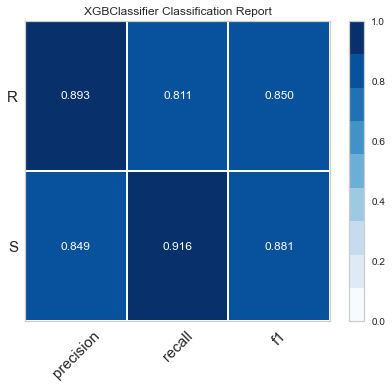

In [25]:
report = ClassificationReport(model, size=(425, 400), classes=classes, cmap = 'Blues', fontsize=15 )

report.score(X_valid, y_valid)
c = report.poof()

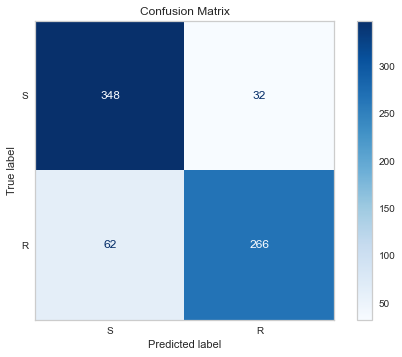

In [26]:
from sklearn.metrics import ConfusionMatrixDisplay
conf =  ConfusionMatrixDisplay.from_estimator(model, X_valid, y_valid, display_labels= ['S', 'R'], cmap = 'Blues') 
conf.ax_.set_title("Confusion Matrix")
plt.grid(None)
plt.show()

In [27]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_valid, predictions)
print("accuracy: %.2f%%" % (accuracy * 100.0))

recall = recall_score(y_valid, predictions, average= 'weighted')
print("recall: %.2f%%" % (recall * 100.0))

from sklearn.metrics import precision_score
precision = precision_score(y_valid, predictions, average= 'weighted')
print("precision: %.2f%%" % (precision * 100.0))

from sklearn.metrics import f1_score
f1 = f1_score(y_valid, predictions, average= 'weighted')
print("f1: %.2f%%" % (f1 * 100.0))


accuracy: 86.72%
recall: 86.72%
precision: 86.91%
f1: 86.66%


## Z:

In [28]:
scaler = StandardScaler()
x_train = scaler.fit_transform(features_z)

/Users/ecem/miniforge3/envs/tf-metal/lib/python3.9/site-packages/sklearn/utils/extmath.py:999: RuntimeWarning: overflow encountered in square
  temp **= 2
/Users/ecem/miniforge3/envs/tf-metal/lib/python3.9/site-packages/sklearn/utils/extmath.py:1005: RuntimeWarning: overflow encountered in square
  new_unnormalized_variance -= correction**2 / new_sample_count
/Users/ecem/miniforge3/envs/tf-metal/lib/python3.9/site-packages/sklearn/utils/extmath.py:1005: RuntimeWarning: invalid value encountered in subtract
  new_unnormalized_variance -= correction**2 / new_sample_count
/Users/ecem/miniforge3/envs/tf-metal/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:84: RuntimeWarning: overflow encountered in square
  upper_bound = n_samples * eps * var + (n_samples * mean * eps) ** 2


In [29]:
X_train, X_valid, y_train, y_valid = train_test_split(x_train, y, train_size=0.8, test_size=0.2,
                                                                random_state=42)
import xgboost as xgb
model  = xgb.XGBClassifier(random_state = 42, eval_metric = 'merror') 

# Fit the model
model.fit(X_train, y_train)

predictions = model.predict(X_valid)

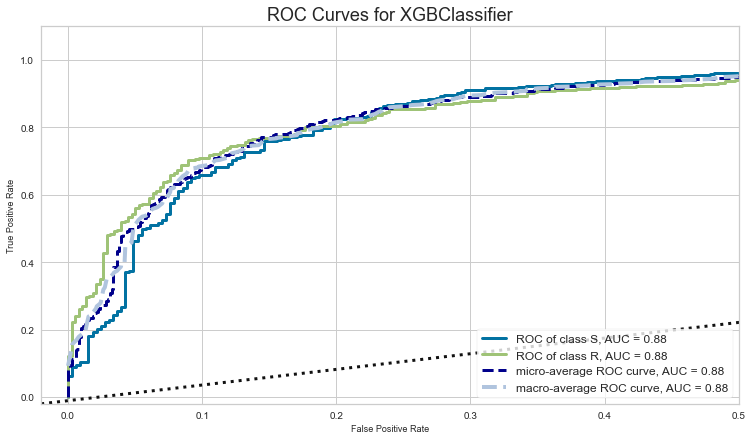

In [30]:
rocauc = ROCAUC(model, size=(900, 500), classes=classes )

rocauc.fit(X_train, y_train)       
rocauc.score(X_valid, y_valid)  
r = rocauc.poof()

/Users/ecem/miniforge3/envs/tf-metal/lib/python3.9/site-packages/yellowbrick/classifier/base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(


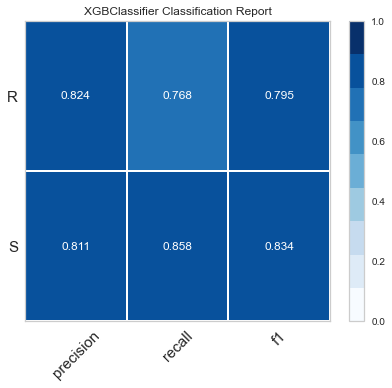

In [31]:
report = ClassificationReport(model, size=(425, 400), classes=classes, cmap = 'Blues', fontsize=15 )

report.score(X_valid, y_valid)
c = report.poof()

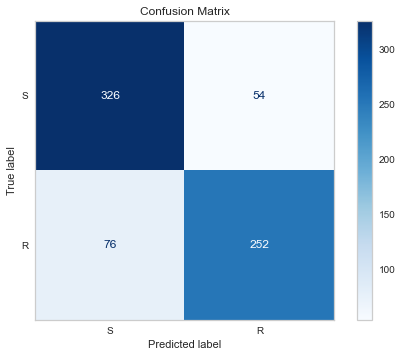

In [32]:
from sklearn.metrics import ConfusionMatrixDisplay
conf =  ConfusionMatrixDisplay.from_estimator(model, X_valid, y_valid, display_labels= ['S', 'R'], cmap = 'Blues') 
conf.ax_.set_title("Confusion Matrix")
plt.grid(None)
plt.show()

In [33]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_valid, predictions)
print("accuracy: %.2f%%" % (accuracy * 100.0))

recall = recall_score(y_valid, predictions, average= 'weighted')
print("recall: %.2f%%" % (recall * 100.0))

from sklearn.metrics import precision_score
precision = precision_score(y_valid, predictions, average= 'weighted')
print("precision: %.2f%%" % (precision * 100.0))

from sklearn.metrics import f1_score
f1 = f1_score(y_valid, predictions, average= 'weighted')
print("f1: %.2f%%" % (f1 * 100.0))


accuracy: 81.64%
recall: 81.64%
precision: 81.68%
f1: 81.58%
